In [47]:
from SingleSlot import QuantumChannelAnalyzer as q
import numpy as np

def main():
    # Example usage
    
    # Create an analyzer instance
    analyzer = q(g=(0.8,1.6), r=0.3, t=10/3,)
    
    # Create a shallow pocket model
    choi_superchannel = analyzer.create_shallow_pocket_model()

    # Create a parameterized unitary
    V = analyzer.parameterised_unitary(0,0,0)
    print("\nParameterized unitary:")
    print(analyzer.qobj_round(V, 2))
    
    # Create Choi state of the unitary
    choi_input = analyzer.choi_state_unitary(V)
    print("\nInput channel:")
    print(analyzer.qobj_round(choi_input, 2))

    # Obtain the Choi state of the output
    choi_output = analyzer.link_product(choi_superchannel, choi_input)
    print("\nOutput channel:")
    print(analyzer.qobj_round(choi_output, 2))

    # Find the closest unitary and the corresponding fidelity (target)
    U, F_U = analyzer.closest_unitary_channel(choi_output)
    print("\nClosest unitary U (rounded):")
    print(analyzer.qobj_round(U, 2))
    print(f"Fidelity (Closest Unitary vs Output): {F_U:.4f}")

if __name__ == "__main__":
    main()


Parameterized unitary:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]

Input channel:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]

Output channel:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.   0.   0.   0.09]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.09 0.   0.   1.  ]]

Closest unitary U (rounded):
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]
Fidelity (Closest Unitary vs Output): 0.7385


In [49]:
from DoubleSlot import QuantumChannelAnalyzer as q
import numpy as np

def main():
    # Example usage
    
    # Create an analyzer instance
    analyzer = q(g=(0.8,0.8,0.8), r=0.3, t=10/3)
    
    # Create a shallow pocket model
    choi_superchannel = analyzer.create_shallow_pocket_model()

    # Create a parameterized unitary
    V1 = analyzer.parameterised_unitary(0,0,0) # [0,2pi]
    print("\nParameterized unitary:")
    print(analyzer.qobj_round(V1, 2))

    V2 = analyzer.parameterised_unitary(0,0,0) # [0,2pi]
    print("\nParameterized unitary:")
    print(analyzer.qobj_round(V2, 2))
    
    # Create Choi state of the unitary
    choi_input1 = analyzer.choi_state_unitary(V1)
    print("\nInput channel1:")
    print(analyzer.qobj_round(choi_input1, 2))

    choi_input2 = analyzer.choi_state_unitary(V2)
    print("\nInput channel2:")
    print(analyzer.qobj_round(choi_input2, 2))

    # Obtain the Choi state of the output
    choi_output = analyzer.link_product(choi_superchannel, choi_input1, choi_input2)
    print("\nOutput channel:")
    print(analyzer.qobj_round(choi_output, 2))
    
    # Find the closest unitary and the corresponding fidelity (target)
    U, F_U = analyzer.closest_unitary_channel(choi_output)
    print("\nClosest unitary U (rounded):")
    print(analyzer.qobj_round(U, 2))
    print(f"Fidelity (Closest Unitary vs Output): {F_U:.4f}")

if __name__ == "__main__":
    main()


Parameterized unitary:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]

Parameterized unitary:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]

Input channel1:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]

Input channel2:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]

Output channel:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.   0.   0.   0.09]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.09 0.   0.   1.  ]]

Closest unitary U (rounded):
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]

In [ ]:
[1,2,3,4]
[4,3,2,1]
 2.5 

 4,6,6,4

In [3]:
# DoubleSlot GP BO moved to a standalone script
from bo_utils import suppress_warnings
from double_slot_bo import run_double_slot_bo

suppress_warnings()
best_x, best_f, png_path, csv_path = run_double_slot_bo(
    g=(0.8, 1.0, 1.1),
    r=0.3,
    t=5.0,
    n_init=15,
    n_iter=80,
    n_candidates=8000,
    seed=1,
    verbose=True,
)

print("\nReturned best_x:", best_x)
print("Returned best_f:", best_f)
print("Saved PNG:", png_path)
print("Saved CSV:", csv_path)




=== DoubleSlot GP BO (maximize F_U) ===
init points: 15, BO iters: 80, candidates/iter: 8000, seed: 1
init 01/15: F_U=0.712389, x=[0. 0. 0. 0. 0. 0.]
init 02/15: F_U=0.732538, x=[3.2159 1.905  1.0094 3.7256 5.3735 0.9458]
init 03/15: F_U=0.759754, x=[5.9719 2.8494 6.0942 1.6342 5.4116 3.0298]
init 04/15: F_U=0.625426, x=[0.9058 0.8422 3.2426 5.2771 5.5074 5.6217]
init 05/15: F_U=0.736865, x=[5.9605 2.5328 0.728  3.2013 2.9651 2.656 ]
init 06/15: F_U=0.792663, x=[1.9593 1.2783 3.9175 3.21   1.7219 3.704 ]
init 07/15: F_U=0.610908, x=[2.6598 1.6482 4.88   4.7314 0.0446 0.1539]
init 08/15: F_U=0.767896, x=[5.2006 4.7147 3.8516 0.9294 4.0572 4.2315]
init 09/15: F_U=0.775863, x=[2.5711 1.7619 5.7636 5.1499 4.5233 5.7748]
init 10/15: F_U=0.756782, x=[3.4532 3.0485 0.2488 4.2932 5.25   5.1951]
init 11/15: F_U=0.661860, x=[0.1732 6.1622 3.3212 4.9455 1.7711 5.5639]
init 12/15: F_U=0.607820, x=[4.7345 6.0423 2.8861 1.204  1.3523 4.1491]
init 13/15: F_U=0.797715, x=[3.3813 4.554  0.3918 5.0414 

In [17]:
# Summarize final mean ± std (over 5 seeds) for each kernel from outputs/<timestamp>/<mode>/*_seeds.csv
import os
import glob
import csv

OUTPUTS_DIR = os.path.join(os.getcwd(), "outputs")
BASELINE_KERNEL = "Linear_DotProduct"  # baseline = linear kernel


def _latest_run_root() -> str | None:
    # run roots are timestamp-named folders under outputs/
    candidates = [p for p in glob.glob(os.path.join(OUTPUTS_DIR, "*")) if os.path.isdir(p)]
    if not candidates:
        return None
    # timestamp format is YYYYMMDD_HHMMSS, so lexicographic max is latest
    return sorted(candidates)[-1]


def _read_last_mean_std(csv_path: str):
    with open(csv_path, "r", newline="") as f:
        reader = csv.DictReader(f)
        last = None
        for row in reader:
            last = row
        if last is None:
            raise ValueError(f"Empty CSV: {csv_path}")
        return float(last["mean"]), float(last["std"])


def _print_summary(run_root: str, mode_prefix: str):
    mode_dir = os.path.join(run_root, mode_prefix)
    pattern = os.path.join(mode_dir, f"{mode_prefix}_*_seeds.csv")
    files = glob.glob(pattern)
    if not files:
        print(f"No files found for mode '{mode_prefix}' under {mode_dir}")
        return

    rows = []
    for fp in files:
        kernel = os.path.basename(fp).replace(f"{mode_prefix}_", "").replace("_seeds.csv", "")
        mean, std = _read_last_mean_std(fp)
        rows.append({"kernel": kernel, "mean": mean, "std": std, "file": os.path.basename(fp)})

    rows = sorted(rows, key=lambda r: r["mean"], reverse=True)

    print(f"\n=== {mode_prefix}: final best-so-far mean ± std (last evaluation) ===")
    for r in rows:
        tag = " (baseline)" if r["kernel"] == BASELINE_KERNEL else ""
        print(f"{r['kernel']}{tag}: {r['mean']:.6f} ± {r['std']:.6f}  |  {r['file']}")

    baseline = [r for r in rows if r["kernel"] == BASELINE_KERNEL]
    if baseline:
        b = baseline[0]
        print(f"Baseline ({BASELINE_KERNEL}) = {b['mean']:.6f} ± {b['std']:.6f}")


run_root = '/Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343'
print("Latest run_root:", run_root)
if run_root:
    _print_summary(run_root, "single_slot")
    _print_summary(run_root, "double_slot")


Latest run_root: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343

=== single_slot: final best-so-far mean ± std (last evaluation) ===
Linear_DotProduct (baseline): 0.851272 ± 0.000000  |  single_slot_Linear_DotProduct_seeds.csv
RationalQuadratic: 0.851272 ± 0.000000  |  single_slot_RationalQuadratic_seeds.csv
Matern15_ARD: 0.851272 ± 0.000000  |  single_slot_Matern15_ARD_seeds.csv
Matern25_ARD: 0.851271 ± 0.000001  |  single_slot_Matern25_ARD_seeds.csv
RBF_ARD: 0.851243 ± 0.000057  |  single_slot_RBF_ARD_seeds.csv
Baseline (Linear_DotProduct) = 0.851272 ± 0.000000

=== double_slot: final best-so-far mean ± std (last evaluation) ===
Matern15_ARD: 0.922058 ± 0.000146  |  double_slot_Matern15_ARD_seeds.csv
Matern25_ARD: 0.922038 ± 0.000049  |  double_slot_Matern25_ARD_seeds.csv
RBF_ARD: 0.921673 ± 0.000478  |  double_slot_RBF_ARD_seeds.csv
RationalQuadratic: 0.920854 ± 0.001005  |  double_slot_RationalQuadratic_seeds.csv
Linear_DotProduct (baseline): 0.897658 ±

In [44]:
run_root = _latest_run_root()
print("Latest run_root:", run_root)
if run_root:
    _print_summary(run_root, "single_slot")
    _print_summary(run_root, "double_slot")

Latest run_root: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260119_004052
No files found for mode 'single_slot' under /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260119_004052/single_slot

=== double_slot: final best-so-far mean ± std (last evaluation) ===
reduced3_Matern15_ARD: 0.921888 ± 0.000172  |  double_slot_reduced3_Matern15_ARD_seeds.csv
reduced3_RBF_ARD: 0.921804 ± 0.000250  |  double_slot_reduced3_RBF_ARD_seeds.csv
reduced3_Matern25_ARD: 0.921673 ± 0.000193  |  double_slot_reduced3_Matern25_ARD_seeds.csv
reduced3_RationalQuadratic: 0.921374 ± 0.000411  |  double_slot_reduced3_RationalQuadratic_seeds.csv
reduced3_Linear_DotProduct: 0.886318 ± 0.014408  |  double_slot_reduced3_Linear_DotProduct_seeds.csv


Latest run_root: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343


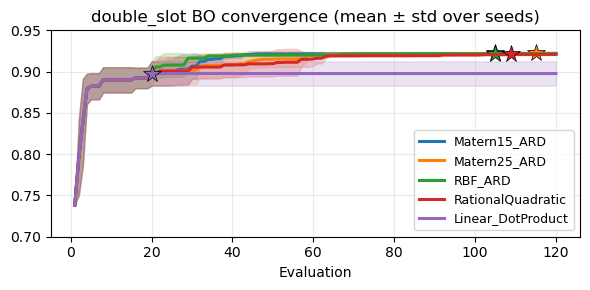

Saved combined plot: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343/double_slot/double_slot_all_kernels_convergence.png


In [42]:
# Plot all kernels' convergence curves in ONE figure (with error bands + star at final mean)
# Uses outputs/<latest_timestamp>/double_slot/double_slot_*_seeds.csv
import os
import glob
import csv
import numpy as np
import matplotlib.pyplot as plt

OUTPUTS_DIR = os.path.join(os.getcwd(), "outputs")


def _latest_run_root() -> str | None:
    candidates = [p for p in glob.glob(os.path.join(OUTPUTS_DIR, "*")) if os.path.isdir(p)]
    if not candidates:
        return None
    return sorted(candidates)[-1]


def _read_trace_mean_std(csv_path: str):
    eval_idx = []
    mean = []
    std = []
    with open(csv_path, "r", newline="") as f:
        reader = csv.DictReader(f)
        for row in reader:
            # np.savetxt may write eval_idx as floats (e.g., 1.000000e+00)
            eval_idx.append(int(round(float(str(row["eval_idx"]).strip()))))
            mean.append(float(str(row["mean"]).strip()))
            std.append(float(str(row["std"]).strip()))
    if not eval_idx:
        raise ValueError(f"Empty CSV: {csv_path}")
    return np.array(eval_idx, dtype=int), np.array(mean, dtype=float), np.array(std, dtype=float)


def plot_all_kernels_one_fig(run_root: str, *, mode_prefix: str = "double_slot", prefer_reduced3: bool = True,
        ylabel = True):
    mode_dir = os.path.join(run_root, mode_prefix)
    pattern = os.path.join(mode_dir, f"{mode_prefix}_*_seeds.csv")
    files = sorted(glob.glob(pattern))
    if not files:
        raise FileNotFoundError(f"No seed CSVs found: {pattern}")

    # If both full6 and reduced3 results exist in the same folder, pick one set.
    # reduced3 files look like: double_slot_reduced3_<KERNEL>_seeds.csv
    reduced3 = []
    full6 = []
    for fp in files:
        kernel = os.path.basename(fp).replace(f"{mode_prefix}_", "").replace("_seeds.csv", "")
        if kernel.startswith("reduced3_"):
            reduced3.append(fp)
        else:
            full6.append(fp)

    chosen = reduced3 if (prefer_reduced3 and len(reduced3) >= 3) else full6
    if not chosen:
        chosen = files

    # Parse kernel names
    series = []
    for fp in chosen:
        kernel = os.path.basename(fp).replace(f"{mode_prefix}_", "").replace("_seeds.csv", "")
        eval_idx, mean, std = _read_trace_mean_std(fp)
        series.append({"kernel": kernel, "eval_idx": eval_idx, "mean": mean, "std": std, "fp": fp})

    # Sort by final mean (so legend is nicely ordered)
    series.sort(key=lambda s: float(s["mean"][-1]), reverse=True)

    plt.figure(figsize=(6, 3))
    for s in series:
        x = s["eval_idx"]
        m = s["mean"]
        sd = s["std"]
        label = s["kernel"]
        line, = plt.plot(x, m, linewidth=2.2, label=label)
        c = line.get_color()
        plt.fill_between(x, m - sd, m + sd, color=c, alpha=0.18)

        # Star = the FIRST step where the mean reaches its (final) optimum plateau.
        # (Using best-so-far traces, the mean is monotonic, so the final value == max; we mark the first time it is attained.)
        m_star = float(m[-1])
        tol = max(1e-10, 1e-8 * abs(m_star))
        hit = np.where(m >= (m_star - tol))[0]
        i_star = int(hit[0]) if len(hit) else int(len(m) - 1)
        plt.plot([x[i_star]], [m[i_star]], marker="*", markersize=13, color=c, markeredgecolor="black", markeredgewidth=0.5)

    plt.title(f"{mode_prefix} BO convergence (mean ± std over seeds)")
    plt.xlabel("Evaluation")
    if ylabel:
        plt.ylabel(r"Best-so-far Fidelity $F_U$")
    plt.ylim(0.7, 0.95)
    plt.grid(True, alpha=0.25)
    plt.legend(loc="lower right", fontsize=9)
    plt.tight_layout()

    out_png = os.path.join(mode_dir, f"{mode_prefix}_all_kernels_convergence.png")
    plt.savefig(out_png, dpi=220, bbox_inches="tight")
    plt.show()
    print("Saved combined plot:", out_png)


run_root = '/Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343'
print("Latest run_root:", run_root)
if run_root:
    plot_all_kernels_one_fig(run_root, mode_prefix="double_slot", prefer_reduced3=False,ylabel = False)



Latest run_root: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260119_004052


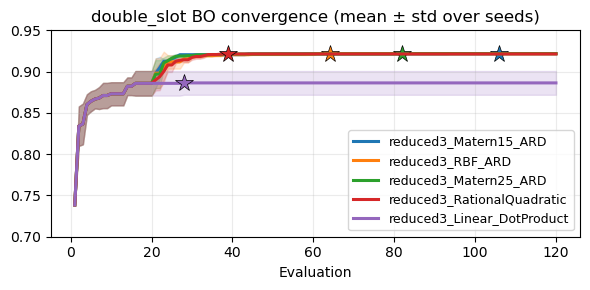

Saved combined plot: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260119_004052/double_slot/double_slot_all_kernels_convergence.png


In [43]:
run_root = '/Users/user/Projects/comp64501_groupwork/simulation/outputs/20260119_004052'
print("Latest run_root:", run_root)
if run_root:
    plot_all_kernels_one_fig(run_root, mode_prefix="double_slot", prefer_reduced3=True,ylabel = False)

Latest run_root: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343


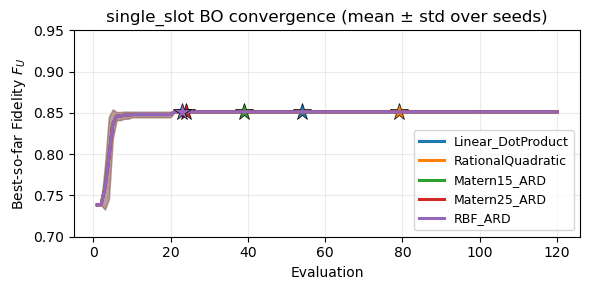

Saved combined plot: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343/single_slot/single_slot_all_kernels_convergence.png


In [ ]:
run_root = '/Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343'
print("Latest run_root:", run_root)
if run_root:
    plot_all_kernels_one_fig(run_root, mode_prefix="single_slot", prefer_reduced3=False, ylabel = True)

Using params: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343/double_slot/params.txt
Excluding kernels: {'Linear_DotProduct'}
Parsed 20 best_x entries after exclusion.

Stats of x3+x4 over best solutions (excluding Linear_DotProduct):
mean(x3+x4) = 6.260969
var(x3+x4)  = 0.014455
2π          = 6.283185

Picked example: {'kernel': 'RationalQuadratic', 'seed': 3, 'best_f': 0.921434625931}
x0 = [2.31171  2.063473 4.675036 1.683065 2.038099 6.102905]
x0_3 + x0_4 = 6.358100654539575


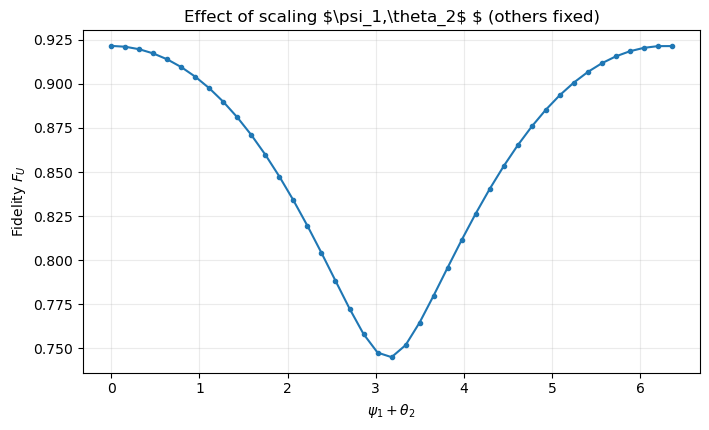


Sweep endpoints:
at scale=1: sum=6.358101, F_U=0.921435
at scale=0: sum=0.000000, F_U=0.921539


In [14]:
# Analysis: statistics of x3+x4 and fidelity sweep by scaling (x3,x4) -> 0
# Exclude Linear_DotProduct (baseline) from both the statistics and the random pick.
import os
import glob
import re
import ast
import numpy as np
import matplotlib.pyplot as plt

from bo_utils import suppress_warnings
from DoubleSlot import QuantumChannelAnalyzer as DoubleSlotAnalyzer

suppress_warnings()

OUTPUTS_DIR = os.path.join(os.getcwd(), "outputs")
EXCLUDE_KERNELS = {"Linear_DotProduct"}

def latest_double_slot_params_txt() -> str:
    # Find latest run_root (timestamp folder) that contains double_slot/params.txt
    candidates = sorted([p for p in glob.glob(os.path.join(OUTPUTS_DIR, "*")) if os.path.isdir(p)])
    for run_root in reversed(candidates):
        fp = os.path.join(run_root, "double_slot", "params.txt")
        if os.path.exists(fp):
            return fp
    raise FileNotFoundError("No double_slot/params.txt found under outputs/<timestamp>/double_slot/")


def parse_params_header(params_path: str):
    # Read the top key/value lines written by _write_params_txt
    g = r = t = None
    with open(params_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("["):
                break
            if line.startswith("g:"):
                g = ast.literal_eval(line.split(":", 1)[1].strip())
            elif line.startswith("r:"):
                r = float(line.split(":", 1)[1].strip())
            elif line.startswith("t:"):
                t = float(line.split(":", 1)[1].strip())
    if g is None or r is None or t is None:
        raise ValueError(f"Failed to parse g/r/t from {params_path}")
    return g, r, t


def parse_all_best_x(params_path: str):
    # Parse lines like: seed=1: best_f=..., best_x=[...]
    xs = []
    meta = []
    rx = re.compile(r"^\s*seed=(\d+):\s*best_f=([0-9eE.+-]+),\s*best_x=(\[.*\])\s*$")
    current_kernel = None
    with open(params_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line.startswith("[best_solutions] kernel:"):
                current_kernel = line.split(":", 1)[1].strip()
                continue
            m = rx.match(line)
            if not m:
                continue
            if current_kernel in EXCLUDE_KERNELS:
                continue
            sd = int(m.group(1))
            bf = float(m.group(2))
            bx = np.array(ast.literal_eval(m.group(3)), dtype=float)
            if bx.shape != (6,):
                continue
            xs.append(bx)
            meta.append({"kernel": current_kernel, "seed": sd, "best_f": bf})
    if not xs:
        raise ValueError(f"No best_x entries parsed from {params_path} (after excluding {EXCLUDE_KERNELS})")
    return np.vstack(xs), meta


params_path = latest_double_slot_params_txt()
print("Using params:", params_path)
print("Excluding kernels:", EXCLUDE_KERNELS)
g, r, t = parse_params_header(params_path)
X_all, meta = parse_all_best_x(params_path)
print(f"Parsed {X_all.shape[0]} best_x entries after exclusion.")

# x3 + x4 (1-indexed) corresponds to X_all[:,2] + X_all[:,3] (0-indexed)
sums = X_all[:, 2] + X_all[:, 3]
mean_sum = float(np.mean(sums))
var_sum = float(np.var(sums))  # population variance
print(f"\nStats of x3+x4 over best solutions (excluding Linear_DotProduct):")
print(f"mean(x3+x4) = {mean_sum:.6f}")
print(f"var(x3+x4)  = {var_sum:.6f}")
print(f"2π          = {2*np.pi:.6f}")

# Randomly pick one (non-linear) solution for the sweep
rng = np.random.default_rng(0)
idx = int(rng.integers(0, X_all.shape[0]))
x0 = X_all[idx].copy()
info0 = meta[idx]
print("\nPicked example:", info0)
print("x0 =", np.round(x0, 6))
print("x0_3 + x0_4 =", float(x0[2] + x0[3]))

analyzer = DoubleSlotAnalyzer(g=g, r=r, t=t)
choi_superchannel = analyzer.create_shallow_pocket_model()

def fidelity_double_slot(x: np.ndarray) -> float:
    th1, ph1, ps1, th2, ph2, ps2 = (float(v) for v in x)
    V1 = analyzer.parameterised_unitary(th1, ph1, ps1)
    V2 = analyzer.parameterised_unitary(th2, ph2, ps2)
    choi_input1 = analyzer.choi_state_unitary(V1)
    choi_input2 = analyzer.choi_state_unitary(V2)
    choi_output = analyzer.link_product(choi_superchannel, choi_input1, choi_input2)
    _, F_U = analyzer.closest_unitary_channel(choi_output)
    return float(np.clip(np.real(F_U), 0.0, 1.0))

# Scale x3 and x4 together from original value down to 0
scales = np.linspace(1.0, 0.0, 41)
fids = []
sum_vals = []

for s in scales:
    x = x0.copy()
    x[2] = x0[2] * s
    x[3] = x0[3] * s
    sum_vals.append(float(x[2] + x[3]))
    fids.append(fidelity_double_slot(x))

fids = np.array(fids, dtype=float)
sum_vals = np.array(sum_vals, dtype=float)

plt.figure(figsize=(7.2, 4.4))
plt.plot(sum_vals, fids, marker="o", markersize=3)
plt.xlabel(r"$\psi_1 + \theta_2$")
plt.title(r"Effect of scaling $\psi_1,\theta_2$ $ (others fixed)")
plt.ylabel(r"Fidelity $F_U$")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

print("\nSweep endpoints:")
print(f"at scale=1: sum={sum_vals[0]:.6f}, F_U={fids[0]:.6f}")
print(f"at scale=0: sum={sum_vals[-1]:.6f}, F_U={fids[-1]:.6f}")



Using params: /Users/user/Projects/comp64501_groupwork/simulation/outputs/20260118_163343/single_slot/params.txt
Excluding kernels: {'Linear_DotProduct'}
Parsed 20 best_x entries after exclusion.

Stats of phi over best solutions (excluding Linear_DotProduct):
mean(phi) = 3.137949
var(phi)  = 0.000077
pi        = 3.141593

Picked example: {'kernel': 'RationalQuadratic', 'seed': 3, 'best_f': 0.851272283983}
x0 = (theta, phi, psi) = [1.371715 3.141521 1.350317]


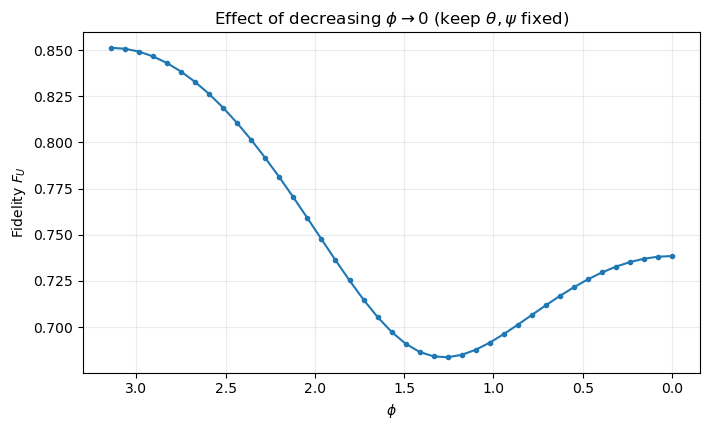


Sweep endpoints:
at phi=phi0: phi=3.141521, F_U=0.851272
at phi=0  : phi=0.000000, F_U=0.738484


In [15]:
# Analysis (Single-slot): statistics of phi and fidelity sweep by decreasing phi -> 0
# Exclude Linear_DotProduct (baseline) from both the statistics and the random pick.
import os
import glob
import re
import ast
import numpy as np
import matplotlib.pyplot as plt

from bo_utils import suppress_warnings
from SingleSlot import QuantumChannelAnalyzer as SingleSlotAnalyzer

suppress_warnings()

OUTPUTS_DIR = os.path.join(os.getcwd(), "outputs")
EXCLUDE_KERNELS = {"Linear_DotProduct"}


def latest_single_slot_params_txt() -> str:
    candidates = sorted([p for p in glob.glob(os.path.join(OUTPUTS_DIR, "*")) if os.path.isdir(p)])
    for run_root in reversed(candidates):
        fp = os.path.join(run_root, "single_slot", "params.txt")
        if os.path.exists(fp):
            return fp
    raise FileNotFoundError("No single_slot/params.txt found under outputs/<timestamp>/single_slot/")


def parse_params_header(params_path: str):
    g = r = t = None
    with open(params_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("["):
                break
            if line.startswith("g:"):
                g = ast.literal_eval(line.split(":", 1)[1].strip())
            elif line.startswith("r:"):
                r = float(line.split(":", 1)[1].strip())
            elif line.startswith("t:"):
                t = float(line.split(":", 1)[1].strip())
    if g is None or r is None or t is None:
        raise ValueError(f"Failed to parse g/r/t from {params_path}")
    return g, r, t


def parse_all_best_x(params_path: str):
    # Parse lines like: seed=1: best_f=..., best_x=[...]
    xs = []
    meta = []
    rx = re.compile(r"^\s*seed=(\d+):\s*best_f=([0-9eE.+-]+),\s*best_x=(\[.*\])\s*$")
    current_kernel = None
    with open(params_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line.startswith("[best_solutions] kernel:"):
                current_kernel = line.split(":", 1)[1].strip()
                continue
            m = rx.match(line)
            if not m:
                continue
            if current_kernel in EXCLUDE_KERNELS:
                continue
            sd = int(m.group(1))
            bf = float(m.group(2))
            bx = np.array(ast.literal_eval(m.group(3)), dtype=float)
            if bx.shape != (3,):
                continue
            xs.append(bx)
            meta.append({"kernel": current_kernel, "seed": sd, "best_f": bf})
    if not xs:
        raise ValueError(f"No best_x entries parsed from {params_path} (after excluding {EXCLUDE_KERNELS})")
    return np.vstack(xs), meta


params_path = latest_single_slot_params_txt()
print("Using params:", params_path)
print("Excluding kernels:", EXCLUDE_KERNELS)

g, r, t = parse_params_header(params_path)
X_all, meta = parse_all_best_x(params_path)
print(f"Parsed {X_all.shape[0]} best_x entries after exclusion.")

# Single-slot best_x = (theta, phi, psi)
phis = X_all[:, 1]
mean_phi = float(np.mean(phis))
var_phi = float(np.var(phis))
print("\nStats of phi over best solutions (excluding Linear_DotProduct):")
print(f"mean(phi) = {mean_phi:.6f}")
print(f"var(phi)  = {var_phi:.6f}")
print(f"pi        = {np.pi:.6f}")

# Randomly pick one (non-linear) solution for the sweep
rng = np.random.default_rng(0)
idx = int(rng.integers(0, X_all.shape[0]))
x0 = X_all[idx].copy()
info0 = meta[idx]
print("\nPicked example:", info0)
print("x0 = (theta, phi, psi) =", np.round(x0, 6))

analyzer = SingleSlotAnalyzer(g=g, r=r, t=t)
choi_superchannel = analyzer.create_shallow_pocket_model()

def fidelity_single_slot(theta: float, phi: float, psi: float) -> float:
    V = analyzer.parameterised_unitary(theta, phi, psi)
    choi_input = analyzer.choi_state_unitary(V)
    choi_output = analyzer.link_product(choi_superchannel, choi_input)
    _, F_U = analyzer.closest_unitary_channel(choi_output)
    return float(np.clip(np.real(F_U), 0.0, 1.0))

# Sweep: keep theta, psi fixed; decrease phi linearly to 0
phi0 = float(x0[1])
theta0 = float(x0[0])
psi0 = float(x0[2])

phi_vals = np.linspace(phi0, 0.0, 41)
fids = np.array([fidelity_single_slot(theta0, ph, psi0) for ph in phi_vals], dtype=float)

plt.figure(figsize=(7.2, 4.4))
plt.plot(phi_vals, fids, marker="o", markersize=3)
plt.gca().invert_xaxis()  # show decreasing phi visually
plt.xlabel(r"$\phi$")
plt.ylabel(r"Fidelity $F_U$")
plt.title(r"Effect of decreasing $\phi\rightarrow 0$ (keep $\theta,\psi$ fixed)")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

print("\nSweep endpoints:")
print(f"at phi=phi0: phi={phi_vals[0]:.6f}, F_U={fids[0]:.6f}")
print(f"at phi=0  : phi={phi_vals[-1]:.6f}, F_U={fids[-1]:.6f}")

